<a href="https://colab.research.google.com/github/imran9891/TensorFlow/blob/main/03__introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practise of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.



In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 19:05:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 74.125.137.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   102MB/s    in 1.0s    

2021-07-15 19:05:28 (102 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.... this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories or folders and {len(filenames)} images in '{dirpath}'.")


There are 2 directories or folders and 1 images in 'pizza_steak'.
There are 2 directories or folders and 1 images in 'pizza_steak/test'.
There are 0 directories or folders and 250 images in 'pizza_steak/test/steak'.
There are 0 directories or folders and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories or folders and 1 images in 'pizza_steak/train'.
There are 0 directories or folders and 750 images in 'pizza_steak/train/steak'.
There are 0 directories or folders and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 15 19:05 .
drwxr-xr-x 1 root root 4096 Jul 15 19:05 ..
-rw-r--r-- 1 root root 6148 Jul 15 19:05 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 15 19:05 test
drwxr-xr-x 4 root root 4096 Jul 15 19:05 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [8]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[1:] # removes .DS_Store
print(class_names)

pizza_steak/train
['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we'll view images from here)
  target_folder = target_dir+target_class
  print(target_folder)

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(target_folder + "/" + random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


pizza_steak/train/pizza
['1912976.jpg']
pizza_steak/train/pizza/1912976.jpg
Image shape: (512, 512, 3)


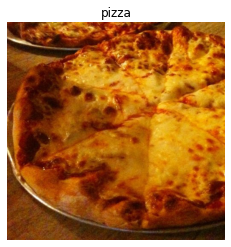

In [10]:
# View a random_image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of diferent pixel values.
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[135,  51,  15],
        [138,  54,  18],
        [136,  52,  16],
        ...,
        [166, 112,  16],
        [160, 106,  10],
        [151,  97,   1]],

       [[133,  50,  16],
        [133,  50,  16],
        [131,  47,  13],
        ...,
        [168, 115,  19],
        [164, 111,  15],
        [158, 105,   9]],

       [[124,  45,  12],
        [123,  44,  11],
        [124,  44,  11],
        ...,
        [159, 109,  14],
        [152, 102,   7],
        [150, 100,   5]],

       ...,

       [[115,  44,  24],
        [112,  41,  21],
        [117,  46,  24],
        ...,
        [ 62,  33,  19],
        [ 68,  38,  27],
        [ 67,  37,  26]],

       [[102,  31,  11],
        [103,  32,  12],
        [113,  42,  20],
        ...,
        [ 70,  41,  27],
        [ 72,  42,  31],
        [ 66,  36,  25]],

       [[103,  30,  11],
        [105,  34,  14],
        [118,  47,  25],
        ...,
        [ 76,  47,  3

In [12]:
# View the image shape
img.shape # returns width,height,color-channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also reffered to as **Normalize**) their pixel values by dividing the image arrays by 225. (since 255 is the maximum pixel value.

In [13]:
# Get all the pixel values between 0 and 1
img/255

array([[[0.52941176, 0.2       , 0.05882353],
        [0.54117647, 0.21176471, 0.07058824],
        [0.53333333, 0.20392157, 0.0627451 ],
        ...,
        [0.65098039, 0.43921569, 0.0627451 ],
        [0.62745098, 0.41568627, 0.03921569],
        [0.59215686, 0.38039216, 0.00392157]],

       [[0.52156863, 0.19607843, 0.0627451 ],
        [0.52156863, 0.19607843, 0.0627451 ],
        [0.51372549, 0.18431373, 0.05098039],
        ...,
        [0.65882353, 0.45098039, 0.0745098 ],
        [0.64313725, 0.43529412, 0.05882353],
        [0.61960784, 0.41176471, 0.03529412]],

       [[0.48627451, 0.17647059, 0.04705882],
        [0.48235294, 0.17254902, 0.04313725],
        [0.48627451, 0.17254902, 0.04313725],
        ...,
        [0.62352941, 0.42745098, 0.05490196],
        [0.59607843, 0.4       , 0.02745098],
        [0.58823529, 0.39215686, 0.01960784]],

       ...,

       [[0.45098039, 0.17254902, 0.09411765],
        [0.43921569, 0.16078431, 0.08235294],
        [0.45882353, 0

## An end-to-end example

Let's build a convolutional neural network to find pattern in our images, more specifically we'll need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to data directories
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = valid_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model (same as tiny VGG on the CNN expainer website)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  # tf.keras.layers.Activations(tf.nn.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 198ms/step - loss: 0.6002 - accuracy: 0.6740 - val_loss: 0.4031 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4152 - accuracy: 0.8153 - val_loss: 0.3234 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3888 - accuracy: 0.8293 - val_loss: 0.3500 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3623 - accuracy: 0.8493 - val_loss: 0.3018 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3164 - accuracy: 0.8667 - val_loss: 0.2764 - val_accuracy: 0.8760


> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

**Exercise:** Go through the CNN explainer website for  minimum of 10 minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [Tensorflow Playground](https://playground.tensorflow.org)

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 0.9838 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than our CNN model(model_1), model_2 performs terribly... let's try to improve it.


In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 5.3515 - accuracy: 0.5873 - val_loss: 1.8765 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 1.0168 - accuracy: 0.6947 - val_loss: 1.2145 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7463 - accuracy: 0.7193 - val_loss: 0.4795 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5306 - accuracy: 0.7553 - val_loss: 0.5089 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4989 - accuracy: 0.7787 - val_loss: 0.4992 - val_accuracy: 0.7580


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
15000000/31000

483.8709677419355

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of models we're using. Where a series of dense layers which has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize).
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches).
3. Created a model (started with a baseline).
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).

### 1. Become one with the data

pizza_steak/train/steak
['22080.jpg']
pizza_steak/train/steak/22080.jpg
Image shape: (342, 512, 3)
pizza_steak/train/pizza
['608085.jpg']
pizza_steak/train/pizza/608085.jpg
Image shape: (512, 512, 3)


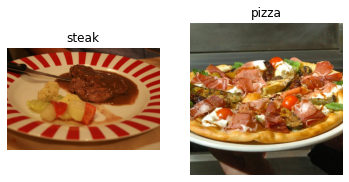

In [25]:
#  Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

No need to classify data into training and test sets since our data is already classified. 

In [26]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**. 

A Batch is a small subset of the dataset that a model looks at during training. Rather than look at all ~10k images, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896?s=20

In [28]:
# Create train & test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [29]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224,224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32, # size of mini-batches to load data into
                                               seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
print(len(images), len(labels))
images.shape, labels.shape

32 32


((32, 224, 224, 3), (32,))

In [37]:
# How many batches are there?
len(train_data) # 1500/32

47

In [40]:
# Get the first 2 images
images[:2], labels[:2], images[0].shape

(array([[[[0.42352945, 0.45098042, 0.5529412 ],
          [0.40000004, 0.427451  , 0.49803925],
          [0.31764707, 0.34509805, 0.36862746],
          ...,
          [0.654902  , 0.43529415, 0.29803923],
          [0.7058824 , 0.49411768, 0.36078432],
          [0.60784316, 0.40000004, 0.2784314 ]],
 
         [[0.23529413, 0.25882354, 0.32156864],
          [0.21176472, 0.23529413, 0.28235295],
          [0.227451  , 0.24705884, 0.27058825],
          ...,
          [0.6862745 , 0.45882356, 0.3137255 ],
          [0.67058825, 0.45098042, 0.3137255 ],
          [0.6901961 , 0.4784314 , 0.34509805]],
 
         [[0.24705884, 0.2509804 , 0.26666668],
          [0.2392157 , 0.2509804 , 0.27058825],
          [0.23529413, 0.24705884, 0.27450982],
          ...,
          [0.7176471 , 0.47450984, 0.32941177],
          [0.6509804 , 0.4156863 , 0.27450982],
          [0.7490196 , 0.5137255 , 0.3803922 ]],
 
         ...,
 
         [[0.909804  , 0.909804  , 0.86274517],
          [0.93725

In [41]:
# View the first batch of labels
labels

array([1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
      dtype=float32)

### Create a CNN model (starts with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [42]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [43]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)), # input_layer specify input shape
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).